In [103]:
import torch
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
import torchvision.datasets as datasets 
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from PIL import Image
from mpl_toolkits.axes_grid1 import ImageGrid
import math

In [104]:
fashion_mnist_train = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=transforms.ToTensor(),
    )

In [105]:
cifar10_train = datasets.CIFAR10(
    root='data',
    train=True,
    download=True,
    transform=transforms.ToTensor(),
    )

Files already downloaded and verified


In [108]:
qmnist_train = datasets.QMNIST(
    root='data',
    train=True,
    download=False,
    transform=transforms.ToTensor(),
    )

In [109]:
# Takes forever to download
places_train = datasets.Places365(
    root='data',
    split='train-standard',
    download=False,
    small=True,
    transform=transforms.ToTensor(),
    )

In [157]:
# Two convolutional layers to customize
def one_channel_conv1(image): 
    if isinstance(image,(np.ndarray, np.generic)):
        image = torch.from_numpy(image)
    c = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=4, stride=1)
    d = nn.Dropout(.2)
    mp = nn.MaxPool2d(2)
    img = image
    out = c(img)
    out = d(out)
    out = mp(out)
    return out

def one_channel_conv2(image, dropout=.1, maxpool=2, kernelSize=4, kernelStride=1): 
    
    if isinstance(image, (np.ndarray, np.generic) ):
        image = torch.from_numpy(image)
    c = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=kernelSize, stride=kernelStride)
    d = nn.Dropout(dropout)
    mp = nn.MaxPool2d(maxpool)
    out = c(image)
    # out = d(out)
    # out = mp(out)
    return out

def three_channel_conv1(image, dropout=.1, maxpool=2, kernelSize=4, kernelStride=1):
    if isinstance(image, (np.ndarray, np.generic) ):
        image = torch.from_numpy(image)
    c = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=kernelSize, stride=kernelStride)
    d = nn.Dropout(dropout)
    mp = nn.MaxPool2d(maxpool)
    out = c(image)
    out = d(out)
    # out = mp(out)
    return out


In [158]:
def display_dataset(dataset, num_of_images=12, list_of_convs=[]):    
    cols = 4
    t = transforms.ToPILImage()
    rows = int(math.ceil((num_of_images/4)))
    fig_list = []
    image_grid_list = []
    for i in range(len(list_of_convs)+1):
        fig_list.append(plt.figure(figsize=(6.0, 6.0)))
        image_grid_list.append(ImageGrid(fig_list[i], 111, nrows_ncols=(rows, cols),
                     axes_pad=0.1))
    
    for j in range(num_of_images):
        reg_img = dataset[j][0]
        image_grid_list[0][j].imshow(t(reg_img))
        
    for i in range(len(list_of_convs)):
        for j in range(num_of_images):
            img = dataset[j][0]
            img = list_of_convs[i](img)
            image_grid_list[i+1][j].imshow(t(img))
    plt.show()

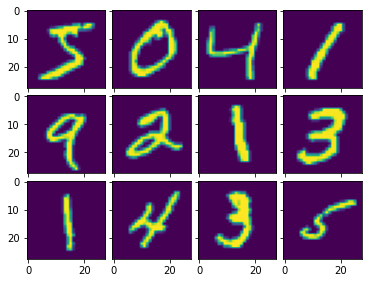

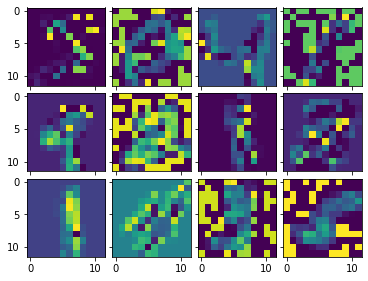

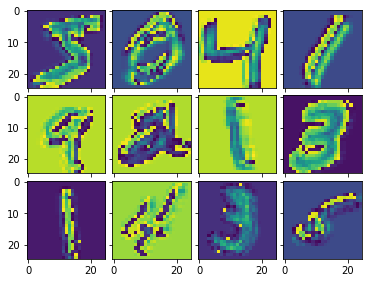

In [159]:
display_dataset(qmnist_train, list_of_convs=[one_channel_conv1, one_channel_conv2])

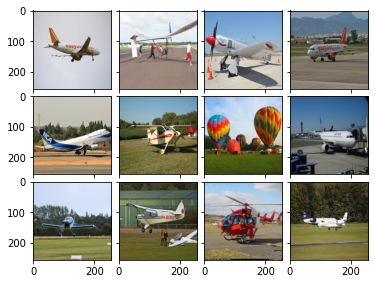

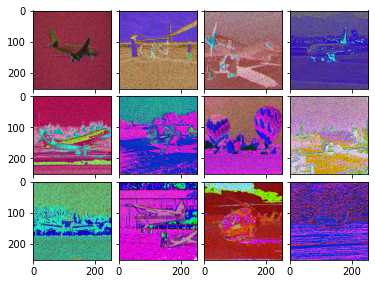

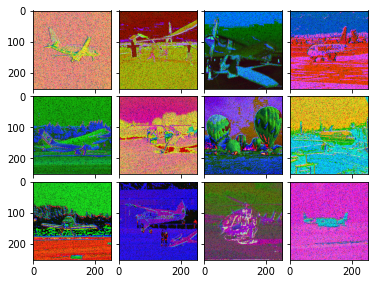

In [160]:
display_dataset(places_train, list_of_convs=[three_channel_conv1, three_channel_conv1])

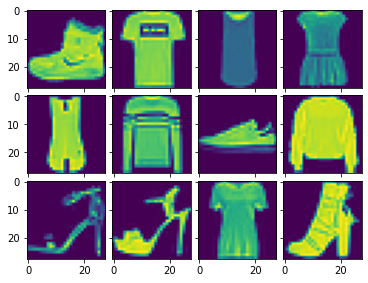

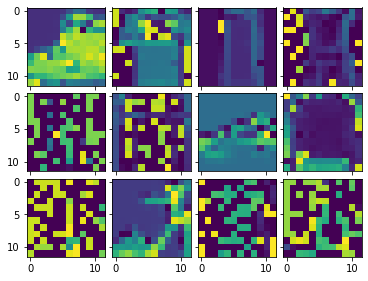

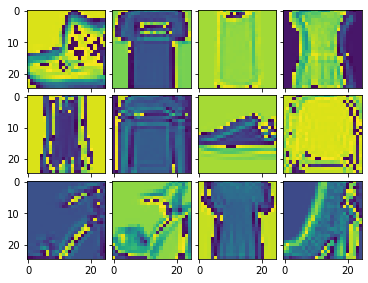

In [161]:
display_dataset(fashion_mnist_train, list_of_convs=[one_channel_conv1, one_channel_conv2])

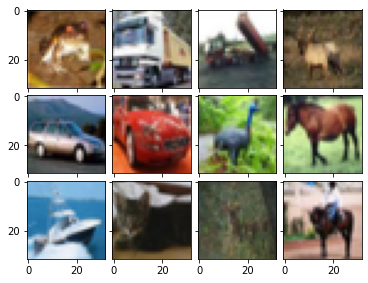

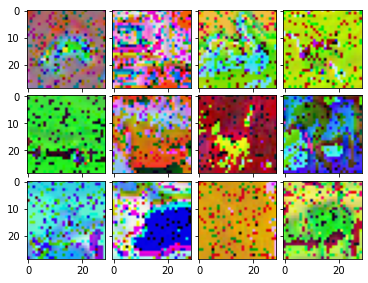

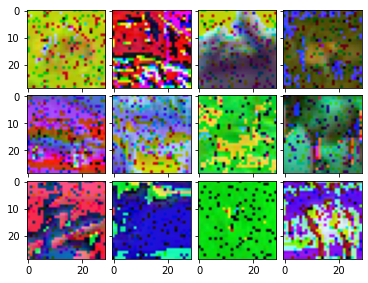

In [162]:
display_dataset(cifar10_train, list_of_convs=[three_channel_conv1, three_channel_conv1])